In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
f = lambda x: -1000*np.sin(np.pi*x)

In [155]:
xs = np.array([-1,1])/np.sqrt(3)
def integrate(f,a,b):
    return sum((b-a)/2 * f((b-a)/2*xi +(b+a)/2) for xi in xs)

In [156]:
def nodes(a,b,n):
    return np.linspace(a,b,n)

In [157]:
def base(x1,x2):
    phil = lambda x: (x2-x)/(x2-x1)
    phir = lambda x: (x-x1)/(x2-x1)
    philprim = lambda x: (-1)/(x2-x1)
    phirprim = lambda x: (1)/(x2-x1)
    return [phil,phir,philprim,phirprim]

In [158]:
def E(x):
    if 0<=x<=1:
        return 2
    return 6

In [159]:
def L(v,vprim,a,b):
    return integrate(lambda x: f(x)*v(x),a,b)

In [160]:
def B(vprim, wprim, a, b):
    return integrate(lambda x: E(x) * vprim(x) * wprim(x), a, b)

In [161]:
def sol(n):
    Nodes = nodes(0,2,n+1)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    for i,(x1,x2) in enumerate(zip(Nodes,Nodes[1:])):
        j=i+1
        phil,phir,philprim,phirprim = base(x1,x2)
        A[i, i] += B(philprim, philprim, x1, x2)
        A[i, j] += B(philprim, phirprim, x1, x2)
        A[j, i] += B(phirprim, philprim, x1, x2)
        A[j, j] += B(phirprim, phirprim, x1, x2)

        b[i] += L(phil,philprim,x1,x2)
        b[j] += L(phir,phirprim,x1,x2)
    A[0,0] -= 4
    b[0] -=8

    A[n, :] = 0
    A[n, n] = 1
    b[n] = 0
    ws = np.linalg.solve(A,b)

    return Nodes, ws+3

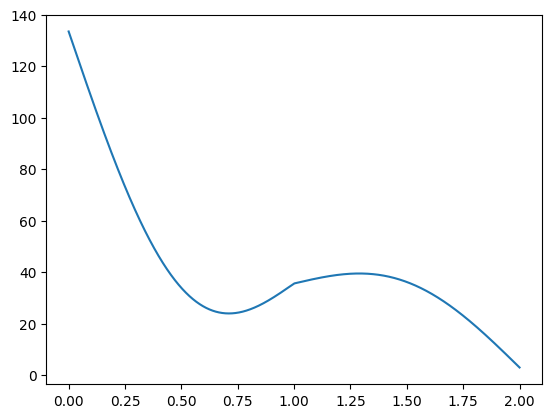

In [163]:
x,y = sol(10000)
plt.plot(x,y)